🙌 Tsaqif Mu'tashim Mufid, 2024 🙌

### Import Usefull Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

### A. Data Wrangling

#### Sebelum memulai predictive analysis yang pertama dilakukan adalah memuat data yang sudah kita ambil dari data center UNICEF dengan menggunakan Pandas

In [3]:
data = pd.read_csv('NUTRITION.csv')
data

,DATAFLOW,REF_AREA:Geographic area,INDICATOR:Indicator,SEX:Sex,AGE:Current age,WEALTH_QUINTILE:Wealth Quintile,RESIDENCE:Residence,MATERNAL_EDU_LVL:Mother's Education Level,HEAD_OF_HOUSE:Head of House,TIME_PERIOD:Time period,...,OBS_STATUS:Observation Status,OBS_CONF:Observation confidentaility,LOWER_BOUND:Lower Bound,UPPER_BOUND:Upper Bound,STD_ERR:Standard Error,WGTD_SAMPL_SIZE:Weighted Sample Size,TIME_PERIOD_METHOD:Time period activity related to when the data are collected,COVERAGE_TIME:The period of time for which data are provided,FREQ_COLL:Time interval at which the source data are collected,OBS_FOOTNOTE:Observation footnote
0,UNICEF:NUTRITION(1.0): Nutrition,IDN: Indonesia,NT_BF_CBF_12_15: Continued breastfeeding (12-1...,F: Female,M12T15: 12 to 15 months old,_T: Total,_T: Total,_T: Total,_T: Total,2003,...,RA: Reanalysed,F: Free,79.500000,90.199997,2.7,498.5,MOF: Middle of fieldwork,1987-2017,0: Not Known,NaN
1,UNICEF:NUTRITION(1.0): Nutrition,IDN: Indonesia,NT_BF_CBF_12_15: Continued breastfeeding (12-1...,F: Female,M12T15: 12 to 15 months old,_T: Total,_T: Total,_T: Total,_T: Total,2007,...,RA: Reanalysed,F: Free,76.199997,84.900002,2.2,531.6,MOF: Middle of fieldwork,1987-2017,0: Not Known,NaN
2,UNICEF:NUTRITION(1.0): Nutrition,IDN: Indonesia,NT_BF_CBF_12_15: Continued breastfeeding (12-1...,F: Female,M12T15: 12 to 15 months old,_T: Total,_T: Total,_T: Total,_T: Total,2012,...,RA: Reanalysed,F: Free,73.500000,83.199997,2.5,541.5,MOF: Middle of fieldwork,1987-2017,0: Not Known,NaN
3,UNICEF:NUTRITION(1.0): Nutrition,IDN: Indonesia,NT_BF_CBF_12_15: Continued breastfeeding (12-1...,F: Female,M12T15: 12 to 15 months old,_T: Total,_T: Total,_T: Total,_T: Total,2017,...,RA: Reanalysed,F: Free,75.000000,83.000000,2.0,588.4,MOF: Middle of fieldwork,1987-2017,0: Not Known,NaN
4,UNICEF:NUTRITION(1.0): Nutrition,IDN: Indonesia,NT_BF_CBF_12_15: Continued breastfeeding (12-1...,M: Male,M12T15: 12 to 15 months old,_T: Total,_T: Total,_T: Total,_T: Total,2003,...,RA: Reanalysed,F: Free,78.400002,87.699997,2.3,522.6,MOF: Middle of fieldwork,1987-2017,0: Not Known,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,UNICEF:NUTRITION(1.0): Nutrition,IDN: Indonesia,"NT_VAS_TWODOSE: Vitamin A Supplementation, two...",_T: Total,M6T59: 6 to 59 months old,_T: Total,_T: Total,_T: Total,_T: Total,2012,...,AD: Adjusted,F: Free,NaN,NaN,NaN,NaN,OTHER: Other,2000-2017,0: Not Known,NaN
10956,UNICEF:NUTRITION(1.0): Nutrition,IDN: Indonesia,"NT_VAS_TWODOSE: Vitamin A Supplementation, two...",_T: Total,M6T59: 6 to 59 months old,_T: Total,_T: Total,_T: Total,_T: Total,2013,...,AD: Adjusted,F: Free,NaN,NaN,NaN,NaN,OTHER: Other,2000-2017,0: Not Known,NaN
10957,UNICEF:NUTRITION(1.0): Nutrition,IDN: Indonesia,"NT_VAS_TWODOSE: Vitamin A Supplementation, two...",_T: Total,M6T59: 6 to 59 months old,_T: Total,_T: Total,_T: Total,_T: Total,2014,...,AD: Adjusted,F: Free,NaN,NaN,NaN,NaN,OTHER: Other,2000-2017,0: Not Known,NaN
10958,UNICEF:NUTRITION(1.0): Nutrition,IDN: Indonesia,"NT_VAS_TWODOSE: Vitamin A Supplementation, two...",_T: Total,M6T59: 6 to 59 months old,_T: Total,_T: Total,_T: Total,_T: Total,2015,...,AD: Adjusted,F: Free,NaN,NaN,NaN,NaN,OTHER: Other,2000-2017,0: Not Known,NaN


Terlihat diatas datanya masih berantakan sekali namun biarkan sejenak untuk kita coba telusuri kembali informasi apa yang bisa didapat dari sana

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10960 entries, 0 to 10959
Data columns (total 30 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   DATAFLOW                                                                        10960 non-null  object 
 1   REF_AREA:Geographic area                                                        10960 non-null  object 
 2   INDICATOR:Indicator                                                             10960 non-null  object 
 3   SEX:Sex                                                                         10960 non-null  object 
 4   AGE:Current age                                                                 10960 non-null  object 
 5   WEALTH_QUINTILE:Wealth Quintile                                                 10960 non-null  object 
 6   RESIDENCE:Resi

Dari data diatas banyak sekali kolom dari tabel, namun di tahap ini kita perlu memasukkan kolom mana saja yang berguna untuk dijadikan feature

In [5]:
# Karena datanya banyak maka dari itu kita menggunakan parameter chunksize untuk mempermudah pemrosesan
data = pd.read_csv('NUTRITION.csv', chunksize=11000)

In [6]:
# Setelah data ter-load menggunakan chunksize maka kita langsung define feature mana yang mau kita ambil
all_chunks = []

for chunk in data:
    # Ekstraksi Kolom Yang Dibutuhkan
    col_to_extract = ['REF_AREA:Geographic area', 
                      'INDICATOR:Indicator',
                      'SEX:Sex',
                      'AGE:Current age',
                      'WEALTH_QUINTILE:Wealth Quintile',
                      'RESIDENCE:Residence',
                      'MATERNAL_EDU_LVL:Mother\'s Education Level',
                      'TIME_PERIOD:Time period',
                      'OBS_VALUE:Observation Value'
                      ]
    chunk = chunk[col_to_extract]
    # print(chunk)
    # Memberi Perubahan Nama Pada Kolom
    chunk = chunk.rename(columns={
        'REF_AREA:Geographic area': 'Country',
        'INDICATOR:Indicator': 'Indicator',
        'SEX:Sex' : 'Gender',
        'AGE:Current age': 'Age',
        'WEALTH_QUINTILE:Wealth Quintile': 'Poverty_Rating',
        'RESIDENCE:Residence': 'Residence',
        'MATERNAL_EDU_LVL:Mother\'s Education Level': 'Maternal_Education',
        'TIME_PERIOD:Time period': 'Year',
        'OBS_VALUE:Observation Value': 'Observation_Value'
    })
    # print(chunk)
    
    # Membersihkan values dan menghapus values sebelumnya :
    chunk['Country'] = chunk['Country'].apply(lambda x: x[x.index(':')+1:])
    chunk['Indicator'] = chunk['Indicator'].apply(lambda x: x[x.index(':')+1:])
    chunk['Gender'] = chunk['Gender'].apply(lambda x: x[x.index(':')+1:])
    chunk['Age'] = chunk['Age'].apply(lambda x: x[x.index(':')+1:])
    chunk['Poverty_Rating'] = chunk['Poverty_Rating'].apply(lambda x: x[x.index(':')+1:])
    chunk['Residence'] = chunk['Residence'].apply(lambda x: x[x.index(':')+1:])
    chunk['Maternal_Education'] = chunk['Maternal_Education'].apply(lambda x: x[x.index(':')+1:])
    
    
    all_chunks.append(chunk)

In [7]:
# Hasil dari ekstraksi fitur yang terpilih dari data
print(all_chunks)

[          Country                                      Indicator   Gender  \
0       Indonesia         Continued breastfeeding (12-15 months)   Female   
1       Indonesia         Continued breastfeeding (12-15 months)   Female   
2       Indonesia         Continued breastfeeding (12-15 months)   Female   
3       Indonesia         Continued breastfeeding (12-15 months)   Female   
4       Indonesia         Continued breastfeeding (12-15 months)     Male   
...           ...                                            ...      ...   
10955   Indonesia   Vitamin A Supplementation, two-dose coverage    Total   
10956   Indonesia   Vitamin A Supplementation, two-dose coverage    Total   
10957   Indonesia   Vitamin A Supplementation, two-dose coverage    Total   
10958   Indonesia   Vitamin A Supplementation, two-dose coverage    Total   
10959   Indonesia   Vitamin A Supplementation, two-dose coverage    Total   

                        Age Poverty_Rating Residence Maternal_Education  Y

In [78]:
# Setelah berhasil mendapatkan data, sekarang kita rubah ke Dataframe menggunakan pandas
df = pd.concat(all_chunks)
df

,Country,Indicator,Gender,Age,Poverty_Rating,Residence,Maternal_Education,Year,Observation_Value
0,Indonesia,Continued breastfeeding (12-15 months),Female,12 to 15 months old,Total,Total,Total,2003,85.7
1,Indonesia,Continued breastfeeding (12-15 months),Female,12 to 15 months old,Total,Total,Total,2007,80.9
2,Indonesia,Continued breastfeeding (12-15 months),Female,12 to 15 months old,Total,Total,Total,2012,78.7
3,Indonesia,Continued breastfeeding (12-15 months),Female,12 to 15 months old,Total,Total,Total,2017,79.3
4,Indonesia,Continued breastfeeding (12-15 months),Male,12 to 15 months old,Total,Total,Total,2003,83.6
...,...,...,...,...,...,...,...,...,...
10955,Indonesia,"Vitamin A Supplementation, two-dose coverage",Total,6 to 59 months old,Total,Total,Total,2012,73.0
10956,Indonesia,"Vitamin A Supplementation, two-dose coverage",Total,6 to 59 months old,Total,Total,Total,2013,82.0
10957,Indonesia,"Vitamin A Supplementation, two-dose coverage",Total,6 to 59 months old,Total,Total,Total,2014,84.0
10958,Indonesia,"Vitamin A Supplementation, two-dose coverage",Total,6 to 59 months old,Total,Total,Total,2015,82.0


In [9]:
# Konversi Kolom Year kedalam bentuk format datetime
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [10]:
# Kita melihat bahwa kolom 'Year' sudah berubah tipedata menjadi Datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10960 entries, 0 to 10959
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Country             10960 non-null  object        
 1   Indicator           10960 non-null  object        
 2   Gender              10960 non-null  object        
 3   Age                 10960 non-null  object        
 4   Poverty_Rating      10960 non-null  object        
 5   Residence           10960 non-null  object        
 6   Maternal_Education  10960 non-null  object        
 7   Year                10960 non-null  datetime64[ns]
 8   Observation_Value   10960 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 770.8+ KB


In [11]:
# Mengecek dataframe apakah terdapat duplikasi data
df.duplicated().sum()

0

In [12]:
# Mengecek dataframe apakah terdapat nilai null
df.isnull().sum()

Country               0
Indicator             0
Gender                0
Age                   0
Poverty_Rating        0
Residence             0
Maternal_Education    0
Year                  0
Observation_Value     0
dtype: int64

In [13]:
# Memanggil dataframe dengan parameter .head(). Defaultnya hanya akan memanggil 5 baris data
df.head()

,Country,Indicator,Gender,Age,Poverty_Rating,Residence,Maternal_Education,Year,Observation_Value
0,Indonesia,Continued breastfeeding (12-15 months),Female,12 to 15 months old,Total,Total,Total,2003-01-01,85.7
1,Indonesia,Continued breastfeeding (12-15 months),Female,12 to 15 months old,Total,Total,Total,2007-01-01,80.9
2,Indonesia,Continued breastfeeding (12-15 months),Female,12 to 15 months old,Total,Total,Total,2012-01-01,78.7
3,Indonesia,Continued breastfeeding (12-15 months),Female,12 to 15 months old,Total,Total,Total,2017-01-01,79.3
4,Indonesia,Continued breastfeeding (12-15 months),Male,12 to 15 months old,Total,Total,Total,2003-01-01,83.6


In [14]:
# Mengecek dataframe yang mempunyai tipe data number
df.select_dtypes('number').head()

,Observation_Value
0,85.7
1,80.9
2,78.7
3,79.3
4,83.6


In [15]:
# Mengecek dataframe yang mempunyai tipe data object
df.select_dtypes('object').head()

,Country,Indicator,Gender,Age,Poverty_Rating,Residence,Maternal_Education
0,Indonesia,Continued breastfeeding (12-15 months),Female,12 to 15 months old,Total,Total,Total
1,Indonesia,Continued breastfeeding (12-15 months),Female,12 to 15 months old,Total,Total,Total
2,Indonesia,Continued breastfeeding (12-15 months),Female,12 to 15 months old,Total,Total,Total
3,Indonesia,Continued breastfeeding (12-15 months),Female,12 to 15 months old,Total,Total,Total
4,Indonesia,Continued breastfeeding (12-15 months),Male,12 to 15 months old,Total,Total,Total


In [16]:
# Mengecek Country apa saja yang pada dataset, namun kasus ini sudah terfokuskan ke Indonesia
df['Country'].unique()

array([' Indonesia'], dtype=object)

In [17]:
# Mengecek Indikator yang diberikan pada dataset
df['Indicator'].unique()

array([' Continued breastfeeding (12-15 months)',
       ' Continued breastfeeding (12-23 months)',
       ' Continued breastfeeding (20-23 months)',
       ' Ever breastfed (0-23 months)',
       ' Early initiation of breastfeeding',
       ' Exclusive breastfeeding (0-5 months)',
       ' Exclusively Breastfed for the First Two Days After Birth',
       ' Mixed Milk Feeding (0-5 months)',
       ' Predominantly breastfeeding (children aged 0 to 5 months)',
       ' Percentage of births without a birth weight in the data source',
       ' Egg and/or flesh foods consumption (6-23months)',
       ' Food group- Breastmilk (6-23months)',
       ' Food group- Dairy (milk, infant formula, yogurt, cheese) (6-23months)',
       ' Food group- Eggs (6-23months)',
       ' Food group- Flesh foods (meat, poultry, fish and organ meats) (6-23months)',
       ' Food group- Grains, roots, tubers and plantains (6-23months)',
       ' Introduction to solid, semi-solid foods (6-8 months)',
       ' Food

In [18]:
# Dari semua indikator dipilih lah beberapa yang menunjang dengan kasus stunting dan malnutrisi pada anak
indicators_intrst = ['Ever breastfed (0-23 months)',
                     'Continued breastfeeding (12-15 months)',
                     'Continued breastfeeding (12-23 months)',
                     'Continued breastfeeding (20-23 months)',
                     'Height-for-age <-2 SD (stunting)',
                     'Introduction to solid, semi-solid foods (6-8 months)',
                     'Mean BMI-for-age',
                     'Minimum meal frequency (children aged 6 to 23 months)',
                     'Weight-for-age <-2 SD (Underweight)', 
                     'Weight-for-height <-2 SD (wasting)',
                     'Weight-for-height <-3 SD (severe wasting)', 
                     'Weight-for-height >+2 SD (overweight)',
                     'Vitamin A Supplementation, two-dose coverage'
                     'Prevalence of low birth weight among new-borns'
                     ]

In [19]:
# Menghapus whitespace pada kolom 'Country' dan 'Indicator' karena masih berbentuk raw data
df['Country'] = df['Country'].str.strip()
df['Indicator'] = df['Indicator'].str.strip()

In [20]:
# Filter Indicator yang dipilih sehingga nantinya kita gabungkan kembali dengan 'Indonesia'
mask = df['Indicator'].isin(indicators_intrst)
ind_df = df[mask]

mask = ind_df['Country'].str.contains('Indonesia')
nutri_indo = ind_df[mask]

In [21]:
# Mengecek dataframe baru
nutri_indo

,Country,Indicator,Gender,Age,Poverty_Rating,Residence,Maternal_Education,Year,Observation_Value
0,Indonesia,Continued breastfeeding (12-15 months),Female,12 to 15 months old,Total,Total,Total,2003-01-01,85.7
1,Indonesia,Continued breastfeeding (12-15 months),Female,12 to 15 months old,Total,Total,Total,2007-01-01,80.9
2,Indonesia,Continued breastfeeding (12-15 months),Female,12 to 15 months old,Total,Total,Total,2012-01-01,78.7
3,Indonesia,Continued breastfeeding (12-15 months),Female,12 to 15 months old,Total,Total,Total,2017-01-01,79.3
4,Indonesia,Continued breastfeeding (12-15 months),Male,12 to 15 months old,Total,Total,Total,2003-01-01,83.6
...,...,...,...,...,...,...,...,...,...
10373,Indonesia,Weight-for-height >+2 SD (overweight),Total,Under 5 years old,Total,Total,Total,2004-01-01,5.1
10374,Indonesia,Weight-for-height >+2 SD (overweight),Total,Under 5 years old,Total,Total,Total,2007-01-01,11.2
10375,Indonesia,Weight-for-height >+2 SD (overweight),Total,Under 5 years old,Total,Total,Total,2010-01-01,12.3
10376,Indonesia,Weight-for-height >+2 SD (overweight),Total,Under 5 years old,Total,Total,Total,2013-01-01,11.5


In [22]:
nutri_indo.shape

(2159, 9)

In [23]:
nutri_indo['Residence'].unique()

array([' Total', ' Rural', ' Urban'], dtype=object)

In [24]:
nutri_indo['Residence'] = nutri_indo['Residence'].str.strip().replace('Total', 'Suburban')
nutri_indo['Residence'].unique()

array(['Suburban', 'Rural', 'Urban'], dtype=object)

In [25]:
nutri_indo['Maternal_Education'].value_counts()


Maternal_Education
 Total                                                        2033
 None and Primary                                               22
 Secondary education (lower and upper secondary education)      22
 Secondary and Higher                                           22
 Tertiary education                                             22
 Primary education                                              22
 Never attended an education programme / No schooling           16
Name: count, dtype: int64

In [26]:
nutri_indo['Maternal_Education'].unique()

array([' Total', ' None and Primary',
       ' Secondary education (lower and upper secondary education)',
       ' Secondary and Higher', ' Tertiary education',
       ' Never attended an education programme / No schooling',
       ' Primary education'], dtype=object)

In [27]:
nutri_indo['Maternal_Education'] = nutri_indo['Maternal_Education'].str.strip().replace('None and Primary', 'Primary education')
nutri_indo['Maternal_Education'] = nutri_indo['Maternal_Education'].str.strip().replace('Secondary and Higher','Secondary education')
nutri_indo['Maternal_Education'] = nutri_indo['Maternal_Education'].str.strip().replace('Secondary education (lower and upper secondary education)', 'Secondary education')
nutri_indo['Maternal_Education'] = nutri_indo['Maternal_Education'].str.strip().replace('Never attended an education programme / No schooling','No education')
nutri_indo['Maternal_Education'] = nutri_indo['Maternal_Education'].str.strip().replace('Total', 'No education')

In [28]:
nutri_indo['Maternal_Education'].value_counts()

Maternal_Education
No education           2049
Primary education        44
Secondary education      44
Tertiary education       22
Name: count, dtype: int64

In [29]:
# Check unique categories in the 'Poverty_Rating' column
nutri_indo['Poverty_Rating'].unique()

array([' Total', ' Lowest', ' Second', ' Middle', ' Fourth', ' Highest',
       ' Bottom 20%', ' Bottom 40%', ' Bottom 60%', ' Bottom 80%',
       ' Richest 20%', ' Richest 40%', ' Richest 60%', ' Richest 80%'],
      dtype=object)

In [30]:
nutri_indo['Poverty_Rating'] = nutri_indo['Poverty_Rating'].str.strip().replace('Total', 'Poor')
nutri_indo['Poverty_Rating'] = nutri_indo['Poverty_Rating'].str.strip().replace('Lowest', 'Poor')
nutri_indo['Poverty_Rating'] = nutri_indo['Poverty_Rating'].str.strip().replace('Second', 'Poor')
nutri_indo['Poverty_Rating'] = nutri_indo['Poverty_Rating'].str.strip().replace('Bottom 20%', 'Poor')
nutri_indo['Poverty_Rating'] = nutri_indo['Poverty_Rating'].str.strip().replace('Bottom 40%', 'Poor')
nutri_indo['Poverty_Rating'] = nutri_indo['Poverty_Rating'].str.strip().replace('Bottom 60%', 'Middle Class')
nutri_indo['Poverty_Rating'] = nutri_indo['Poverty_Rating'].str.strip().replace('Bottom 80%', 'Middle Class')
nutri_indo['Poverty_Rating'] = nutri_indo['Poverty_Rating'].str.strip().replace('Middle', 'Middle Class')
nutri_indo['Poverty_Rating'] = nutri_indo['Poverty_Rating'].str.strip().replace('Fourth', 'Middle Class')
nutri_indo['Poverty_Rating'] = nutri_indo['Poverty_Rating'].str.strip().replace('Highest', 'Rich')
nutri_indo['Poverty_Rating'] = nutri_indo['Poverty_Rating'].str.strip().replace('Richest 20%', 'Rich')
nutri_indo['Poverty_Rating'] = nutri_indo['Poverty_Rating'].str.strip().replace('Richest 40%', 'Rich')
nutri_indo['Poverty_Rating'] = nutri_indo['Poverty_Rating'].str.strip().replace('Richest 60%', 'Rich')
nutri_indo['Poverty_Rating'] = nutri_indo['Poverty_Rating'].str.strip().replace('Richest 80%', 'Rich')

In [31]:
nutri_indo['Poverty_Rating'].value_counts()

Poverty_Rating
Poor            2021
Middle Class      76
Rich              62
Name: count, dtype: int64

In [32]:
nutri_indo['Gender'].value_counts()

Gender
 Total     1097
 Female     531
 Male       531
Name: count, dtype: int64

In [33]:
nutri_indo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2159 entries, 0 to 10377
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Country             2159 non-null   object        
 1   Indicator           2159 non-null   object        
 2   Gender              2159 non-null   object        
 3   Age                 2159 non-null   object        
 4   Poverty_Rating      2159 non-null   object        
 5   Residence           2159 non-null   object        
 6   Maternal_Education  2159 non-null   object        
 7   Year                2159 non-null   datetime64[ns]
 8   Observation_Value   2159 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 168.7+ KB


In [34]:
nutri_indo.to_csv('Nutrition_Indonesia.csv', index=False)

### B. Exploratory Data Analysis and Vizualizations
Di section ini kita akan melakukan data analisis terhadap dataset yang sudah dibuat meliputi Univariate, Bivariate dan Multivariate. 

#### Univariate Analysis

##### 1. Univariate Analysis Terhadap Data Numberic Variable 'Observation_Value'

In [35]:
nutri_indo.describe().T

,count,mean,min,25%,50%,75%,max,std
Year,2159,2005-12-17 15:05:05.141269120,2000-01-01 00:00:00,2001-01-01 00:00:00,2004-01-01 00:00:00,2010-01-01 00:00:00,2018-01-01 00:00:00,NaN
Observation_Value,2159.0,30.451366,-0.7,4.6,19.1,54.0,99.1,31.448346


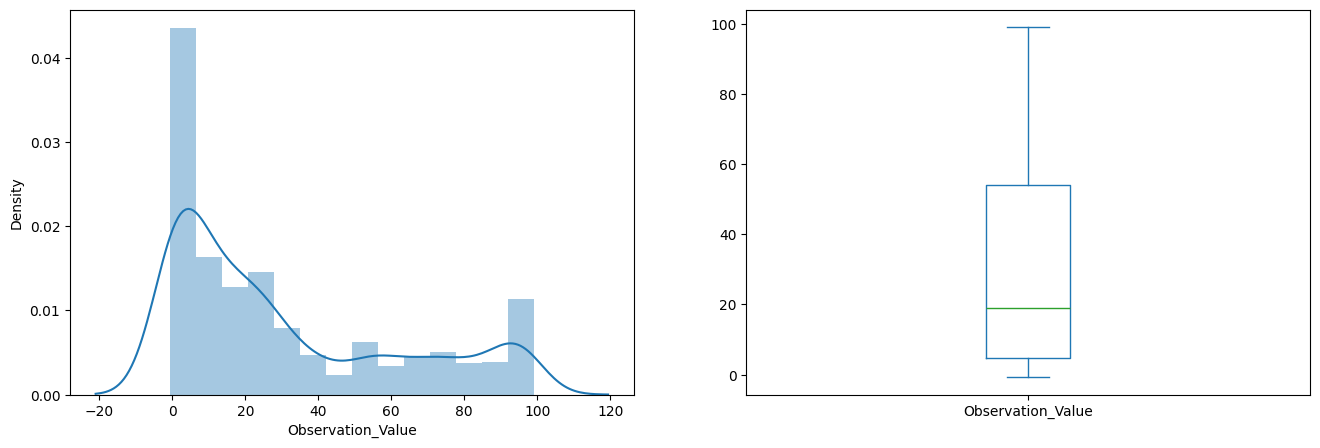

In [36]:
# Build diskplot and boxplot check how distribution of "Observation_Value" looks like with matplotlib
plt.figure(figsize=[16, 5])
plt.subplot(121)
sns.distplot(nutri_indo["Observation_Value"])
plt.subplot(122)
nutri_indo["Observation_Value"].plot.box(figsize=(16, 5))
plt.show()

Observasi

- Hasil yang didapat dari visual data terhadap variabel target 'Observation_Value' tidak terdistribusi secara normal bisa terlihat pada 'Density' yang sangat condong ke kanan (Right-Skewed or Positive-Skewed)
- Selanjutnya, data yang sudah di plotting menggunakan boxplot terlihat tidak ada outliers yang menandakan kita tidak memerlukan perlakuan khusus untuk mentiadakan outliers pada data kita

##### 2. Univariate Analysis Terhadap Data Categorical Variable 'Residence'

In [37]:
nutri_indo['Residence'].value_counts()

Residence
Suburban    1947
Rural        106
Urban        106
Name: count, dtype: int64

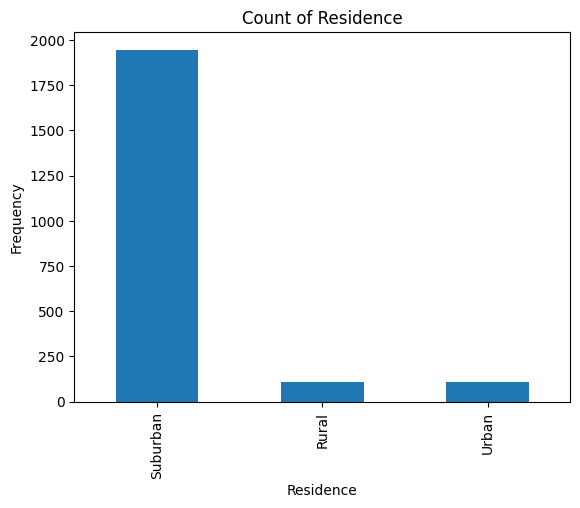

In [38]:
# Visualizing the number of different types of Residence
nutri_indo["Residence"].value_counts().plot(kind="bar", xlabel="Residence", ylabel="Frequency", title = "Count of Residence");

Observasi
- Sebagian Besar Penduduk Indonesia Bertempat Tinggal Di Wilayah Pinggiran (Suburban)

##### 3. Univariate Analysis Terhadap Data Categorical Variable 'Poverty_Rating'

In [39]:
nutri_indo['Poverty_Rating'].value_counts()

Poverty_Rating
Poor            2021
Middle Class      76
Rich              62
Name: count, dtype: int64

<Axes: title={'center': 'Count of Poverty Rating'}, xlabel='Poverty_Rating', ylabel='Frequency'>

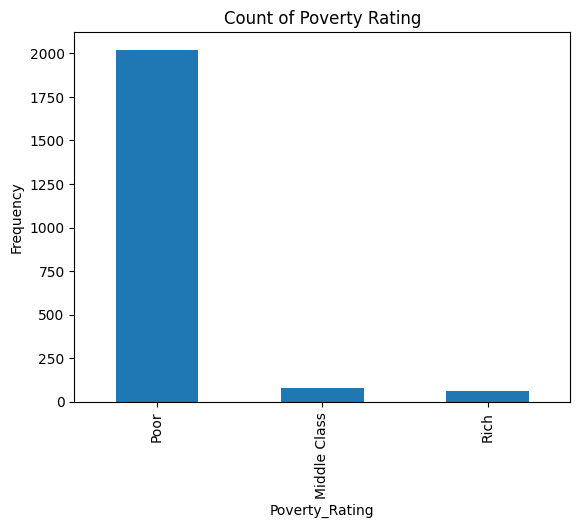

In [40]:
nutri_indo["Poverty_Rating"].value_counts().plot(kind="bar", xlabel="Poverty_Rating", ylabel="Frequency", title="Count of Poverty Rating")

Observasi
- Menurut data yang sudah di visual, Sebagian Besar Masyarakat Indonesia Berasal Dari Keluarga Berekonomi Rendah

##### 4. Univariate Analysis Terhadap Data Categorical Variable 'Maternal_Education'

In [41]:
nutri_indo['Maternal_Education'].value_counts()

Maternal_Education
No education           2049
Primary education        44
Secondary education      44
Tertiary education       22
Name: count, dtype: int64

<Axes: title={'center': 'Count of Maternal Education'}, xlabel='Maternal Education', ylabel='Frequency'>

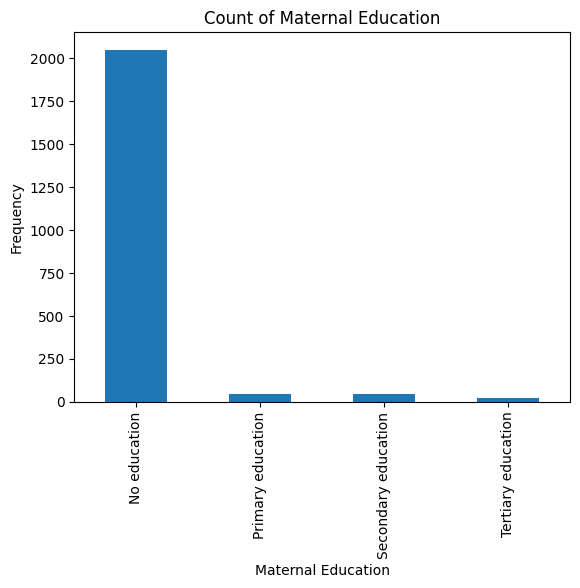

In [42]:
nutri_indo['Maternal_Education'].value_counts().plot(kind='bar', xlabel='Maternal Education', ylabel='Frequency', title='Count of Maternal Education')

Observasi
- Sebagian Besar Warga Indonesia Tidak Berlatar Pendidikan Yang Baik

#### Bivariate Analysis

##### 1. Bivariate Analysis of Categorical Variable Maternal_Education and Categorical Variable Indicator

In [43]:
nutri_indo['Maternal_Education'].value_counts()

Maternal_Education
No education           2049
Primary education        44
Secondary education      44
Tertiary education       22
Name: count, dtype: int64

In [44]:
education_indo = nutri_indo.pivot_table(index='Maternal_Education', columns='Indicator', values='Observation_Value', aggfunc=np.mean,  fill_value=0)

In [45]:
education_indo.rename(columns={'Ever breastfed (0-23 months)': 'Breastfed (0-23 months)'}, inplace='True')
education_indo.rename(columns={'Continued breastfeeding (12-15 months)': 'Breastfed (12-15 months)'}, inplace='True')
education_indo.rename(columns={'Continued breastfeeding (12-23 months)': 'Breastfed (12-23 months)'}, inplace='True')
education_indo.rename(columns={'Continued breastfeeding (20-23 months)': 'Breastfed (20-23 months)'}, inplace='True')
education_indo.rename(columns={'Introduction to solid, semi-solid foods (6-8 months)': 'Solid_Food'}, inplace='True')
education_indo.rename(columns={'Mean BMI-for-age': 'BMI_age'}, inplace='True')
education_indo.rename(columns={'Minimum meal frequency (children aged 6 to 23 months)':'Meal_Frequency'}, inplace= 'True')
education_indo.rename(columns={'Height-for-age <-2 SD (stunting)':'Stunting'}, inplace='True')
education_indo.rename(columns={'Weight-for-age <-2 SD (Underweight)': 'Underweight'}, inplace='True')
education_indo.rename(columns={'Weight-for-height <-2 SD (wasting)': 'Wasting'}, inplace='True')
education_indo.rename(columns={'Weight-for-height <-3 SD (severe wasting)': 'Severe_Wasting'}, inplace='True')
education_indo.rename(columns={'Weight-for-height >+2 SD (overweight)': 'Overweight'}, inplace='True')

In [46]:
education_indo.head()

Indicator,Breastfed (12-15 months),Breastfed (12-23 months),Breastfed (20-23 months),Breastfed (0-23 months),Stunting,Solid_Food,BMI_age,Meal_Frequency,Underweight,Wasting,Severe_Wasting,Overweight
Maternal_Education,,,,,,,,,,,,
No education,80.065455,69.2775,55.062264,95.108784,38.571311,86.866667,-0.236052,68.218,22.597816,10.094262,3.580738,5.835656
Primary education,86.762500,77.7500,65.250000,95.787500,0.000000,83.550000,0.000000,62.000,0.000000,0.000000,0.000000,0.000000
Secondary education,76.625000,65.2125,49.225000,95.000000,0.000000,88.837500,0.000000,69.975,0.000000,0.000000,0.000000,0.000000
Tertiary education,61.675000,53.5250,38.500000,96.150000,0.000000,91.850000,0.000000,75.500,0.000000,0.000000,0.000000,0.000000


Observasi
- Didapatkan data kasus stunting lebih dominan kepada mayoritas yang tidak mempunyai pendidikan.
- Selain itu, indikator lainnya seperti Underweight juga lebih dominan terhadap kategori yang tidak mempunyai latar pendidikan.
- Indikator Overweight pun berhubungan terhadap kategori yang tidak mempunyai latar pendidian. 

<Axes: xlabel='Indicator', ylabel='Indicator'>

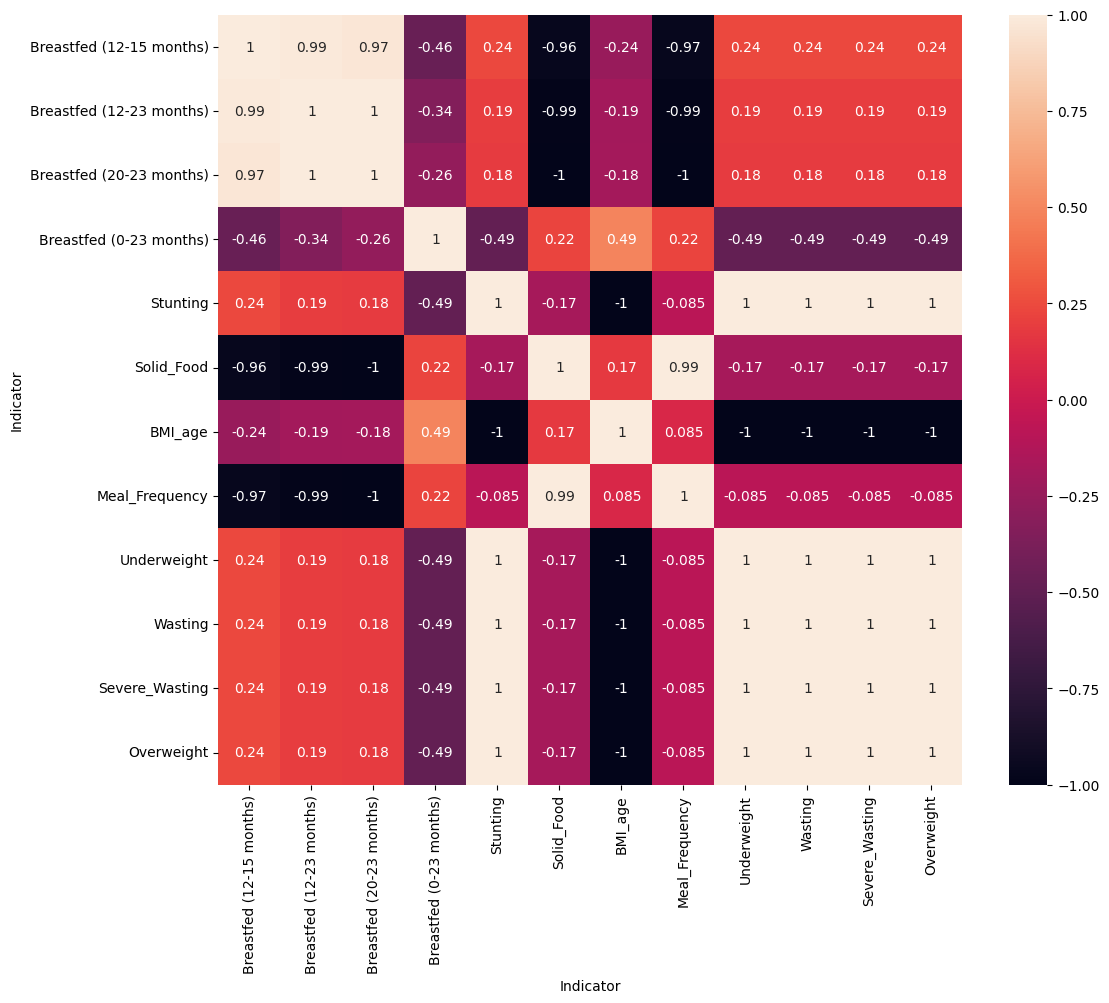

In [47]:
# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(education_indo.corr(), annot=True,)

Observasi
- Berdasarkan heatmap sendiri, korelasi paling tinggi terhadap kasus stunting tentu indikator Underweight, Wasting, Severve_Wasting, Overweight.
- Selain itu Breastfed (12 - 15 Month) mempunyai korelasi yang cukup signifikan yaitu 0.24 untuk kasus stunting di ikuti oleh indikator Breastfed dalam jenjang waktu yang berbeda yakni 0.19 dan 0.18.
- Berdasarkan heatmap tersebut kategori pendidikan juga turut serta bepengaruh terhadap ASI yang diberikan oleh batita hal ini bisa dilihat pada indikator BMI_Age Breastfed (0 - 23 Month ) sebesar 0.49.

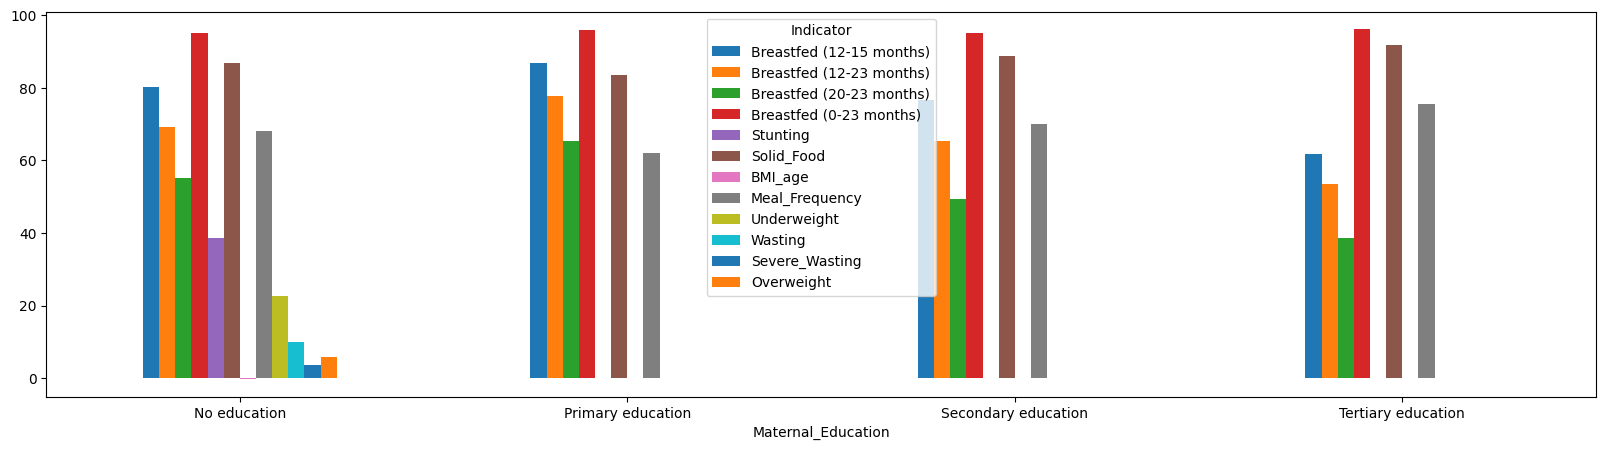

In [48]:
education_indo.plot(kind='bar', rot=0)
plt.gcf().set_size_inches(20, 5)

Observasi
- Dari plot bar juga dapat diketahui bahwa Stunting terjadi biasanya pada kategori yang tidak mendapatkan pendidikan.

In [49]:
# grouping maternal education and breastfeeding

meb = education_indo.groupby('Maternal_Education')[[
    'Breastfed (0-23 months)', 'Breastfed (12-15 months)', 'Breastfed (12-23 months)', 'Breastfed (20-23 months)']].mean().reset_index()
meb

Indicator,Maternal_Education,Breastfed (0-23 months),Breastfed (12-15 months),Breastfed (12-23 months),Breastfed (20-23 months)
0,No education,95.108784,80.065455,69.2775,55.062264
1,Primary education,95.787500,86.762500,77.7500,65.250000
2,Secondary education,95.000000,76.625000,65.2125,49.225000
3,Tertiary education,96.150000,61.675000,53.5250,38.500000


Observasi
- Kita sepakat bahwa pengadaan ASI yang cukup telah dilakukan di segala sektor pendidikan khususnya minimal pada Primary Education. Selanjutnya diberikan asupan ASI mulai berkurang pada rentang jangka waktu tertentu dalam jenjang pendidikan yang lebih tinggi.

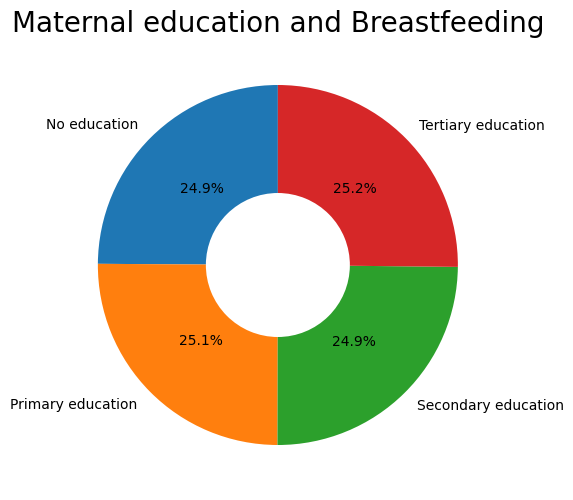

In [50]:
# Create a donut chart 'Breastfed (12-15 months)', 'Breastfed (12-23 months)', 'Breastfed (20-23 months)'
plt.pie(meb['Breastfed (0-23 months)'], labels=meb['Maternal_Education'],
        autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.6))

# Draw a circle in the center to create the donut effect
centre_circle = plt.Circle((0, 0), 0.25, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.title('Maternal education and Breastfeeding', fontsize=20)
plt.savefig('MateduBreastfeed', bbox_inches='tight', dpi=300)

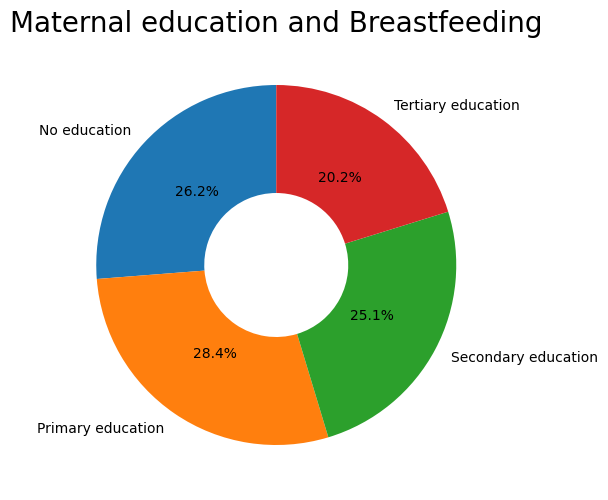

In [51]:
# Create a donut chart 'Breastfed (12-23 months)', 'Breastfed (20-23 months)'
plt.pie(meb['Breastfed (12-15 months)'], labels=meb['Maternal_Education'],
        autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.6))

# Draw a circle in the center to create the donut effect
centre_circle = plt.Circle((0, 0), 0.25, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.title('Maternal education and Breastfeeding', fontsize=20)
plt.savefig('MateduBreastfeed', bbox_inches='tight', dpi=300)

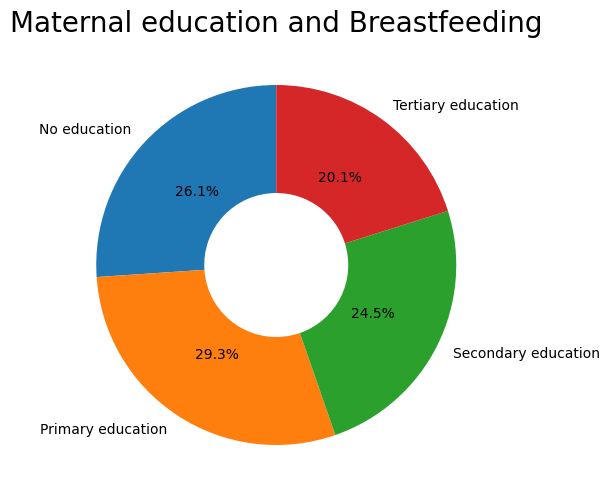

In [52]:
# Create a donut chart'Breastfed (20-23 months)'
plt.pie(meb['Breastfed (12-23 months)'], labels=meb['Maternal_Education'],
        autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.6))

# Draw a circle in the center to create the donut effect
centre_circle = plt.Circle((0, 0), 0.25, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.title('Maternal education and Breastfeeding', fontsize=20)
plt.savefig('MateduBreastfeed', bbox_inches='tight', dpi=300)

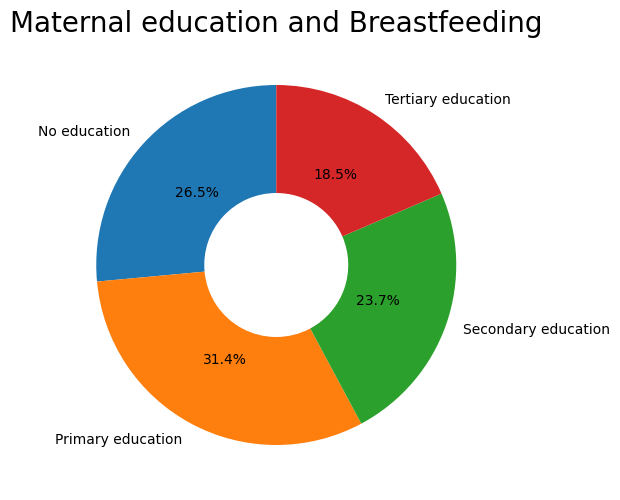

In [53]:
# Create a donut chart
plt.pie(meb['Breastfed (20-23 months)'], labels=meb['Maternal_Education'],
        autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.6))

# Draw a circle in the center to create the donut effect
centre_circle = plt.Circle((0, 0), 0.25, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.title('Maternal education and Breastfeeding', fontsize=20)
plt.savefig('MateduBreastfeed', bbox_inches='tight', dpi=300)

In [54]:
# Grouping maternal education and severe wasting

mebsw = education_indo.groupby('Maternal_Education')[
    'Severe_Wasting'].mean().reset_index()
mebsw

,Maternal_Education,Severe_Wasting
0,No education,3.580738
1,Primary education,0.000000
2,Secondary education,0.000000
3,Tertiary education,0.000000


In [55]:
# Grouping maternal education and underweight

mebuw = education_indo.groupby('Maternal_Education')[
    'Underweight'].mean().reset_index()
mebuw

,Maternal_Education,Underweight
0,No education,22.597816
1,Primary education,0.000000
2,Secondary education,0.000000
3,Tertiary education,0.000000


##### 2. Bivariate Analysis of Categorical Variable Poverty_Ratings and Categorical Variable Indicator

In [56]:
nutri_indo['Poverty_Rating'].value_counts()

Poverty_Rating
Poor            2021
Middle Class      76
Rich              62
Name: count, dtype: int64

In [57]:
poverty_indo = nutri_indo.pivot_table(index='Poverty_Rating', columns='Indicator', values='Observation_Value', aggfunc=np.mean,  fill_value=0)

In [58]:
poverty_indo.rename(columns={'Ever breastfed (0-23 months)': 'Breastfed (0-23 months)'}, inplace='True')
poverty_indo.rename(columns={'Continued breastfeeding (12-15 months)': 'Breastfed (12-15 months)'}, inplace='True')
poverty_indo.rename(columns={'Continued breastfeeding (12-23 months)': 'Breastfed (12-23 months)'}, inplace='True')
poverty_indo.rename(columns={'Continued breastfeeding (20-23 months)': 'Breastfed (20-23 months)'}, inplace='True')
poverty_indo.rename(columns={'Introduction to solid, semi-solid foods (6-8 months)': 'Solid_Food'}, inplace='True')
poverty_indo.rename(columns={'Mean BMI-for-age': 'BMI_age'}, inplace='True')
poverty_indo.rename(columns={'Minimum meal frequency (children aged 6 to 23 months)': 'Meal_Frequency'}, inplace='True')
poverty_indo.rename(columns={'Height-for-age <-2 SD (stunting)': 'Stunting'}, inplace='True')
poverty_indo.rename(columns={'Weight-for-age <-2 SD (Underweight)': 'Underweight'}, inplace='True')
poverty_indo.rename(columns={'Weight-for-height <-2 SD (wasting)': 'Wasting'}, inplace='True')
poverty_indo.rename(columns={'Weight-for-height <-3 SD (severe wasting)': 'Severe_Wasting'}, inplace='True')
poverty_indo.rename(columns={'Weight-for-height >+2 SD (overweight)': 'Overweight'}, inplace='True')

In [59]:
poverty_indo.head()

Indicator,Breastfed (12-15 months),Breastfed (12-23 months),Breastfed (20-23 months),Breastfed (0-23 months),Stunting,Solid_Food,BMI_age,Meal_Frequency,Underweight,Wasting,Severe_Wasting,Overweight
Poverty_Rating,,,,,,,,,,,,
Middle Class,78.012500,69.800000,56.487500,95.245000,0.000000,87.9125,0.000000,67.825000,0.000000,0.000000,0.000000,0.000000
Poor,80.290476,69.506818,55.057377,95.509524,38.571311,86.6400,-0.236052,67.885185,22.597816,10.094262,3.580738,5.835656
Rich,68.750000,56.250000,44.425000,94.418182,0.000000,89.9000,0.000000,76.350000,0.000000,0.000000,0.000000,0.000000


Observasi
- Disamping pendidikan, kategori kekayaan juga dieksplor lebih mendalam. Didapatkan data akhir bahwa kasus stunting terjadi kepada masyarakat mayoritas yang memiliki kekayaan rendah.
- Kekayaan rendah juga mempunyai beberapa korelasi yang berhubungan dengan Underweight, Wasting, Severe_Wasting, dan juga Overweight.

<Axes: xlabel='Indicator', ylabel='Indicator'>

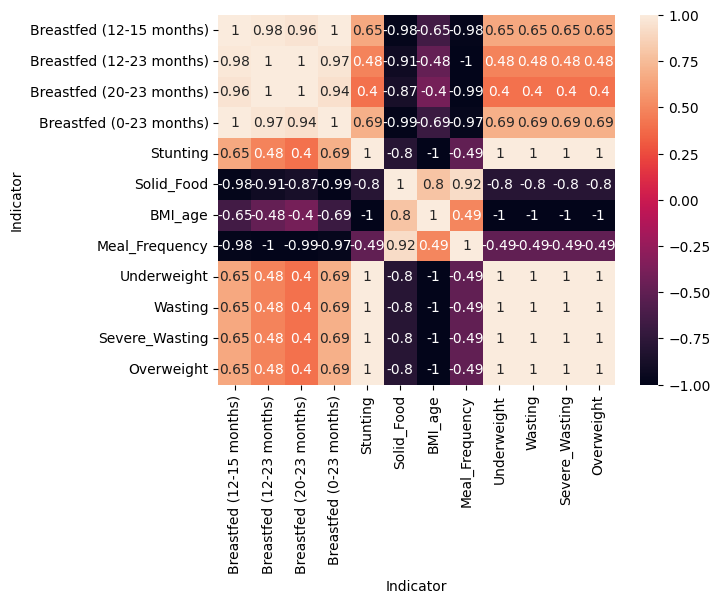

In [60]:
sns.heatmap(poverty_indo.corr(), annot=True)

Observasi:
- Stunting tampaknya terkait erat dengan pemberian ASI pada anak usia 0-23 bulan (Breastfed), yang menunjukkan korelasi yang signifikan dengan tingkat kekayaan masyarakat sekitar, mencapai nilai sebesar 0.69. Namun, hubungan ini cenderung mengecil setelah anak mencapai usia 15 bulan ke atas.
- Solid_Food dengan BMI_Age menunjukkan korelasi yang tinggi sebesar 0.8 menunjukkan bahwa ada kecenderungan di mana peningkatan konsumsi makanan padat berkaitan erat dengan peningkatan nilai indeks massa tubuh berdasarkan usia 
- Solid_Food dengan Meal_Frequency pun tinggi 0.92 menunjukkan bahwa ketika konsumsi makanan padat meningkat atau menurun, frekuensi makan juga mengikuti pola yang serupa. Dengan kata lain, adanya nilai yang tinggi pada Solid_Food cenderung berkorelasi positif dengan peningkatan frekuensi makan

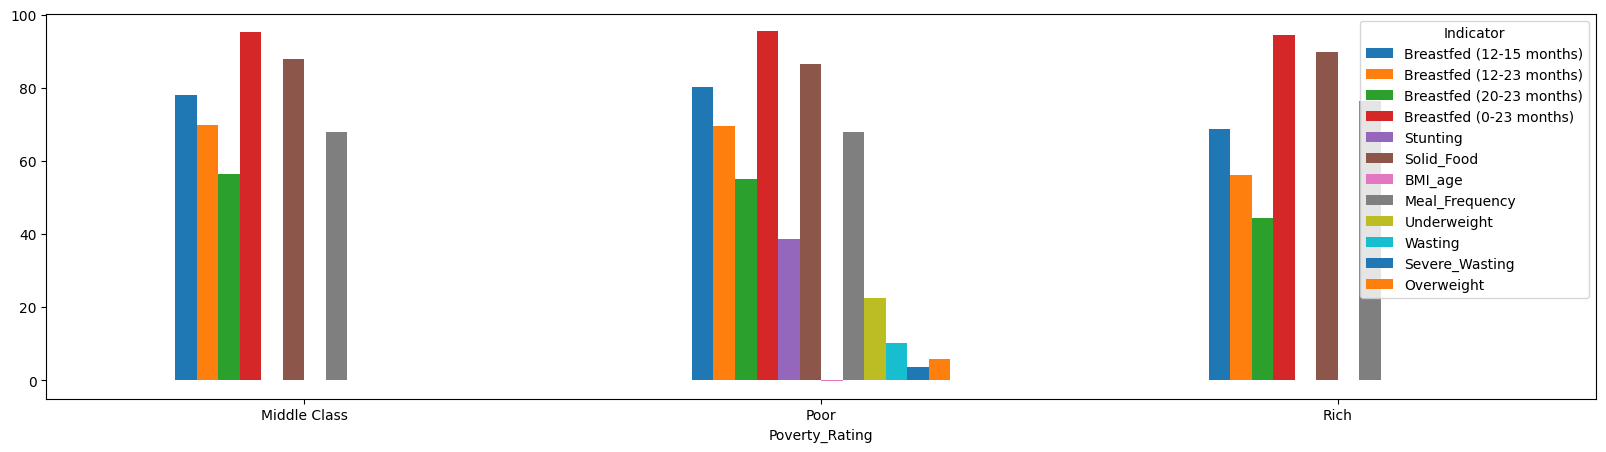

In [61]:
poverty_indo.plot(kind='bar', rot=0)
plt.gcf().set_size_inches(20, 5)

Observasi
- Pada diagram plot bar sendiri terlihat bahwa kasus stunting dimiliki oleh masyarakat yang mempunyai kekayaan rendah.

##### 3. Bivariate Analysis of Categorical Variable Year and Categorical Variable Indicator

In [62]:
year_indo = nutri_indo.pivot_table(index='Year', columns='Indicator', values='Observation_Value', aggfunc=np.mean,  fill_value=0)

In [63]:
year_indo.rename(columns={'Ever breastfed (0-23 months)': 'Breastfed (0-23 months)'}, inplace='True')
year_indo.rename(columns={'Continued breastfeeding (12-15 months)': 'Breastfed (12-15 months)'}, inplace='True')
year_indo.rename(columns={'Continued breastfeeding (12-23 months)': 'Breastfed (12-23 months)'}, inplace='True')
year_indo.rename(columns={'Continued breastfeeding (20-23 months)': 'Breastfed (20-23 months)'}, inplace='True')
year_indo.rename(columns={'Introduction to solid, semi-solid foods (6-8 months)': 'Solid_Food'}, inplace='True')
year_indo.rename(columns={'Mean BMI-for-age': 'BMI_age'}, inplace='True')
year_indo.rename(columns={'Minimum meal frequency (children aged 6 to 23 months)': 'Meal_Frequency'}, inplace='True')
year_indo.rename(columns={'Height-for-age <-2 SD (stunting)': 'Stunting'}, inplace='True')
year_indo.rename(columns={'Weight-for-age <-2 SD (Underweight)': 'Underweight'}, inplace='True')
year_indo.rename(columns={'Weight-for-height <-2 SD (wasting)': 'Wasting'}, inplace='True')
year_indo.rename(columns={'Weight-for-height <-3 SD (severe wasting)': 'Severe_Wasting'}, inplace='True')
year_indo.rename(columns={'Weight-for-height >+2 SD (overweight)': 'Overweight'}, inplace='True')

In [64]:
year_indo.reset_index()

Indicator,Year,Breastfed (12-15 months),Breastfed (12-23 months),Breastfed (20-23 months),Breastfed (0-23 months),Stunting,Solid_Food,BMI_age,Meal_Frequency,Underweight,Wasting,Severe_Wasting,Overweight
0,2000-01-01,0.000000,0.000,0.000000,0.000000,45.814815,0.000000,-0.237037,0.000000,27.046296,5.374074,0.859259,1.283333
1,2001-01-01,0.000000,0.000,0.000000,0.000000,44.794444,0.000000,-0.242593,0.000000,25.425926,5.205556,0.777778,1.292593
2,2002-01-01,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.853571,0.000000,0.000000,0.000000
3,2003-01-01,83.773684,73.692,58.684211,95.907143,0.000000,86.418750,0.000000,0.000000,22.644643,0.000000,0.000000,0.000000
4,2004-01-01,0.000000,0.000,0.000000,0.000000,29.471429,0.000000,-0.458929,0.000000,20.080357,14.708929,5.312500,5.428571
5,2005-01-01,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.244643,0.000000,0.000000,0.000000
6,2007-01-01,79.626316,67.792,49.611111,94.373810,38.530435,84.966667,-0.091304,0.000000,18.465217,14.813043,6.856522,12.400000
7,2010-01-01,0.000000,0.000,0.000000,0.000000,37.186957,0.000000,0.039130,0.000000,17.395652,12.904348,5.713043,13.604348
8,2012-01-01,77.526316,67.372,55.138889,95.614286,0.000000,91.243750,0.000000,65.333333,0.000000,0.000000,0.000000,0.000000
9,2013-01-01,0.000000,0.000,0.000000,0.000000,34.600000,0.000000,-0.095652,0.000000,18.795652,13.717391,6.886957,12.652174


In [65]:
year_indo.corr()

Indicator,Breastfed (12-15 months),Breastfed (12-23 months),Breastfed (20-23 months),Breastfed (0-23 months),Stunting,Solid_Food,BMI_age,Meal_Frequency,Underweight,Wasting,Severe_Wasting,Overweight
Indicator,,,,,,,,,,,,
Breastfed (12-15 months),1.000000,0.999880,0.997768,0.999237,-0.450098,0.998140,0.333533,0.603536,-0.599498,-0.310288,-0.197820,-0.193070
Breastfed (12-23 months),0.999880,1.000000,0.998574,0.999061,-0.457325,0.997962,0.335742,0.607105,-0.601115,-0.318836,-0.206565,-0.201305
Breastfed (20-23 months),0.997768,0.998574,1.000000,0.997851,-0.483046,0.997488,0.343502,0.637449,-0.624828,-0.349373,-0.237866,-0.230781
Breastfed (0-23 months),0.999237,0.999061,0.997851,1.000000,-0.454515,0.999504,0.335081,0.631804,-0.626464,-0.315287,-0.202813,-0.197779
Stunting,-0.450098,-0.457325,-0.483046,-0.454515,1.000000,-0.459490,-0.524339,-0.512908,0.437599,0.767474,0.632538,0.617003
Solid_Food,0.998140,0.997962,0.997488,0.999504,-0.459490,1.000000,0.336520,0.643767,-0.638215,-0.321265,-0.208978,-0.203583
BMI_age,0.333533,0.335742,0.343502,0.335081,-0.524339,0.336520,1.000000,0.282300,-0.354672,-0.419242,-0.242095,0.006458
Meal_Frequency,0.603536,0.607105,0.637449,0.631804,-0.512908,0.643767,0.282300,1.000000,-0.933852,-0.464392,-0.398459,-0.379594
Underweight,-0.599498,-0.601115,-0.624828,-0.626464,0.437599,-0.638215,-0.354672,-0.933852,1.000000,0.207492,0.109626,0.076085


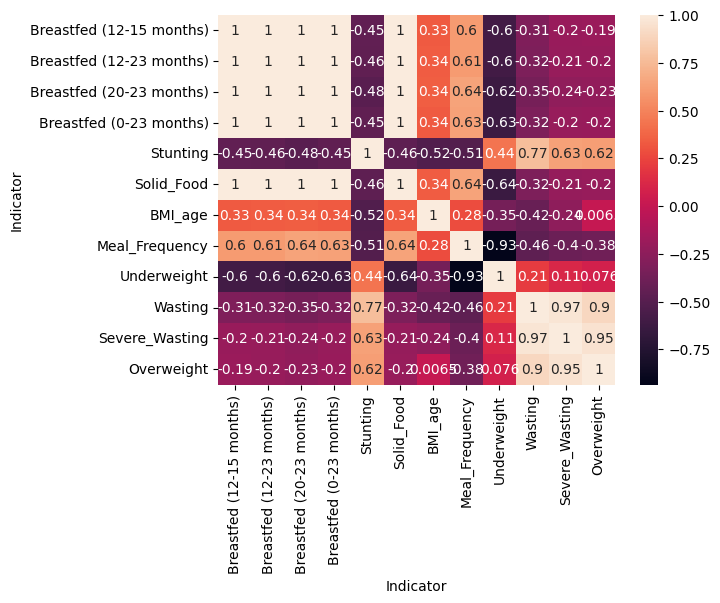

In [66]:
sns.heatmap(year_indo.corr(), annot=True)
plt.show()

#### Multivariate Analysis

In [67]:
country_years_indo = nutri_indo.pivot_table(index=['Country', 'Year'], columns='Indicator', values='Observation_Value', aggfunc=np.mean,  fill_value=0)

In [68]:
country_years_indo.rename(columns={'Ever breastfed (0-23 months)': 'Breastfed (0-23 months)'}, inplace='True')
country_years_indo.rename(columns={'Continued breastfeeding (12-15 months)': 'Breastfed (12-15 months)'}, inplace='True')
country_years_indo.rename(columns={'Continued breastfeeding (12-23 months)': 'Breastfed (12-23 months)'}, inplace='True')
country_years_indo.rename(columns={'Continued breastfeeding (20-23 months)': 'Breastfed (20-23 months)'}, inplace='True')
country_years_indo.rename(columns={'Introduction to solid, semi-solid foods (6-8 months)': 'Solid_Food'}, inplace='True')
country_years_indo.rename(columns={'Mean BMI-for-age': 'BMI_age'}, inplace='True')
country_years_indo.rename(columns={'Minimum meal frequency (children aged 6 to 23 months)': 'Meal_Frequency'}, inplace='True')
country_years_indo.rename(columns={'Height-for-age <-2 SD (stunting)': 'Stunting'}, inplace='True')
country_years_indo.rename(columns={'Weight-for-age <-2 SD (Underweight)': 'Underweight'}, inplace='True')
country_years_indo.rename(columns={'Weight-for-height <-2 SD (wasting)': 'Wasting'}, inplace='True')
country_years_indo.rename(columns={'Weight-for-height <-3 SD (severe wasting)': 'Severe_Wasting'}, inplace='True')
country_years_indo.rename(columns={'Weight-for-height >+2 SD (overweight)': 'Overweight'}, inplace='True')

In [ ]:
# reset index
country_years_indo.reset_index()

country_years_indo.head()

Indicator             Breastfed (12-15 months)  Breastfed (12-23 months)  \
Country   Year                                                             
Indonesia 2000-01-01                  0.000000                     0.000   
          2001-01-01                  0.000000                     0.000   
          2002-01-01                  0.000000                     0.000   
          2003-01-01                 83.773684                    73.692   
          2004-01-01                  0.000000                     0.000   

Indicator             Breastfed (20-23 months)  Breastfed (0-23 months)  \
Country   Year                                                            
Indonesia 2000-01-01                  0.000000                 0.000000   
          2001-01-01                  0.000000                 0.000000   
          2002-01-01                  0.000000                 0.000000   
          2003-01-01                 58.684211                95.907143   
          2004-01-01                  0.000000                 0.000000   

Indicator              Stunting  Solid_Food   BMI_age  Meal_Frequency  \
Country   Year                                                          
Indonesia 2000-01-01  45.814815     0.00000 -0.237037             0.0   
          2001-01-01  44.794444     0.00000 -0.242593             0.0   
          2002-01-01   0.000000     0.00000  0.000000             0.0   
          2003-01-01   0.000000    86.41875  0.000000             0.0   
          2004-01-01  29.471429     0.00000 -0.458929             0.0   

Indicator             Underweight    Wasting  Severe_Wasting  Overweight  
Country   Year                                                            
Indonesia 2000-01-01    27.046296   5.374074        0.859259    1.283333  
          2001-01-01    25.425926   5.205556        0.777778    1.292593  
          2002-01-01    22.853571   0.000000        0.000000    0.000000  
          2003-01-01    22.644643   0.000000        0.000000    0.000000  
          2004-01-01    20.080357  14.708929        5.312500    5.428571

In [ ]:
# stunting by country over years
sry = country_years_indo.groupby(['Country', 'Year'])['Stunting'].mean().reset_index()
sry

,Country,Year,Stunting
0,Indonesia,2000-01-01,45.814815
1,Indonesia,2001-01-01,44.794444
2,Indonesia,2002-01-01,0.000000
3,Indonesia,2003-01-01,0.000000
4,Indonesia,2004-01-01,29.471429
5,Indonesia,2005-01-01,0.000000
6,Indonesia,2007-01-01,38.530435
7,Indonesia,2010-01-01,37.186957
8,Indonesia,2012-01-01,0.000000
9,Indonesia,2013-01-01,34.600000


In [ ]:
# Function to plot indicators by region over different variables
def plot_year_region_trend(data, indicator):
  plt.figure(figsize=(11, 7))

  # Get unique regions
  reg = data['Country'].unique()

  # Create subplots
  for i, region in enumerate(reg, start=1):
      plt.subplot(len(reg), 1, i)

      # Filter the DataFrame for the current region
      data_for_region = data[data['Country'] == region]

      # Plot the line for the current region
      sns.lineplot(data=data_for_region, x='Year',
                   y=indicator, marker='o', ci=None)
      plt.savefig('Year{}'.format(indicator), bbox_inches='tight', dpi=300)
      plt.title(region)  # Set the title as the region name

  # Adjust layout
  plt.tight_layout()

  plt.show()

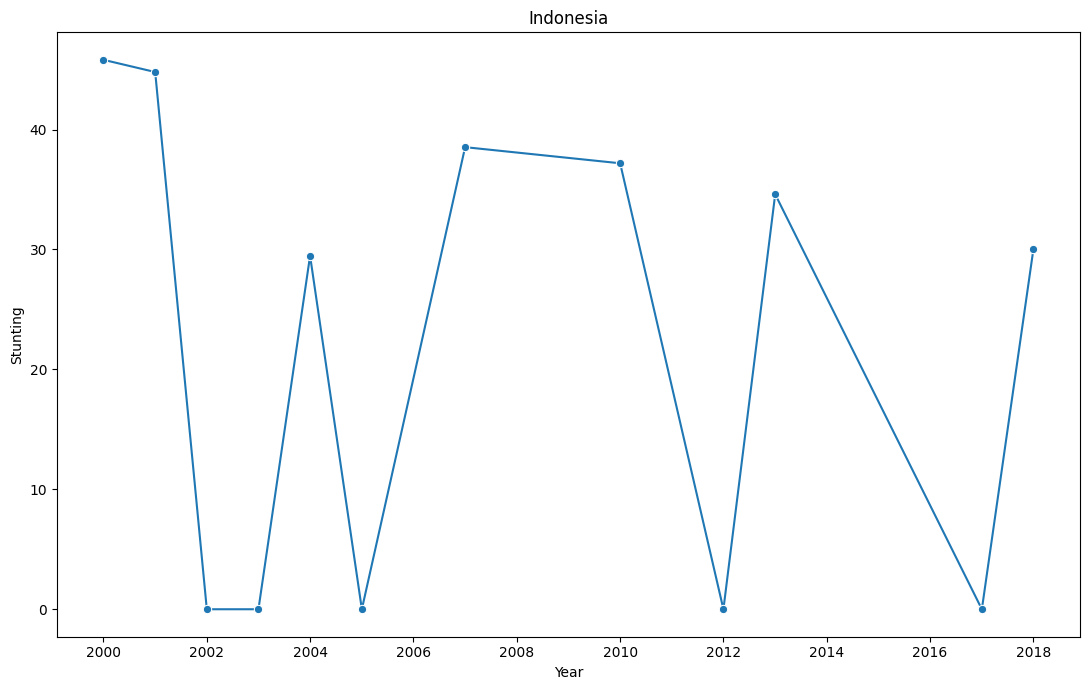

In [ ]:
plot_year_region_trend(sry, 'Stunting')

Observasi
- Trend dari tahun ke tahun Indonesia masih termasuk kategori yang cukup tinggi untuk kasus Stunting

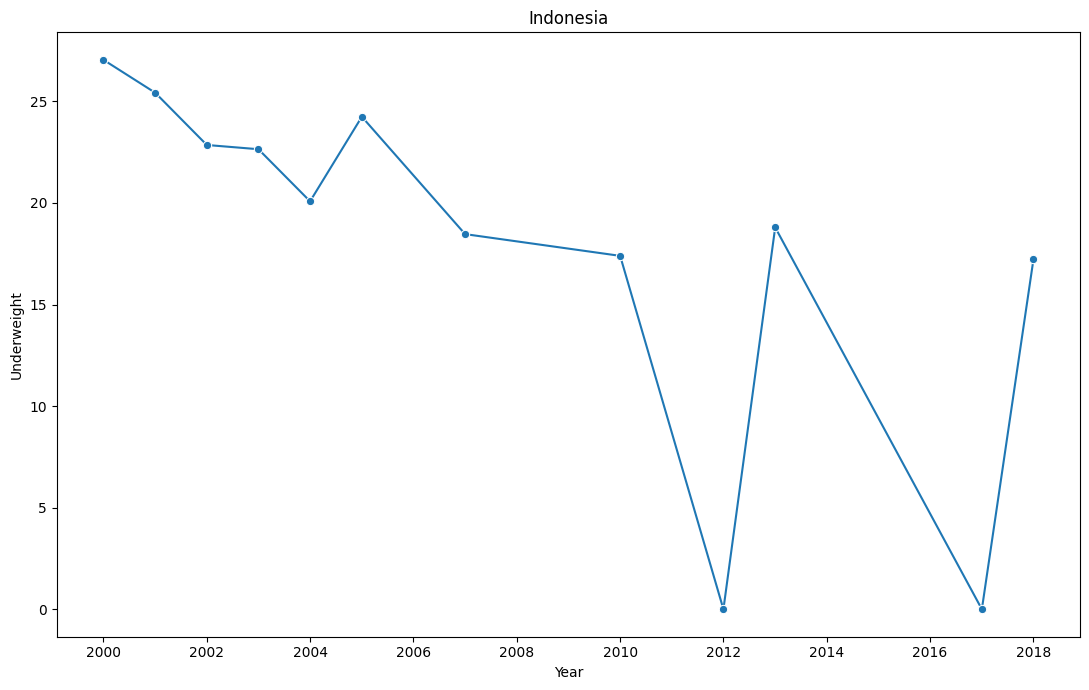

In [ ]:
ury = country_years_indo.groupby(['Country', 'Year'])['Underweight'].mean().reset_index()
plot_year_region_trend(ury, 'Underweight')

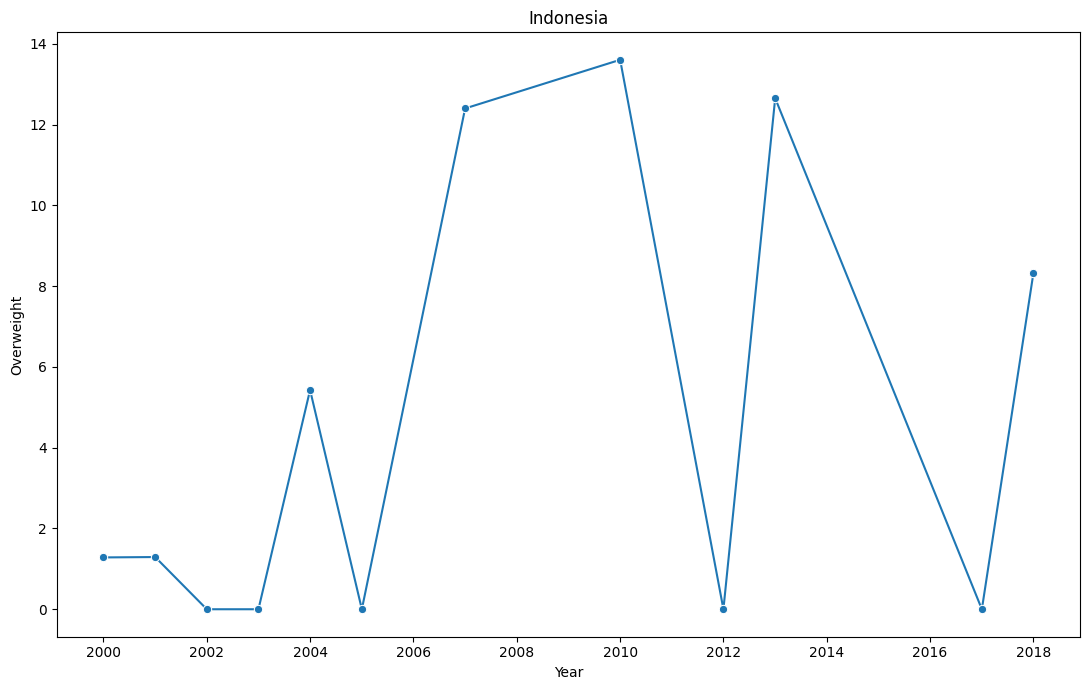

In [ ]:
ory = country_years_indo.groupby(['Country', 'Year'])['Overweight'].mean().reset_index()
plot_year_region_trend(ory, 'Overweight')

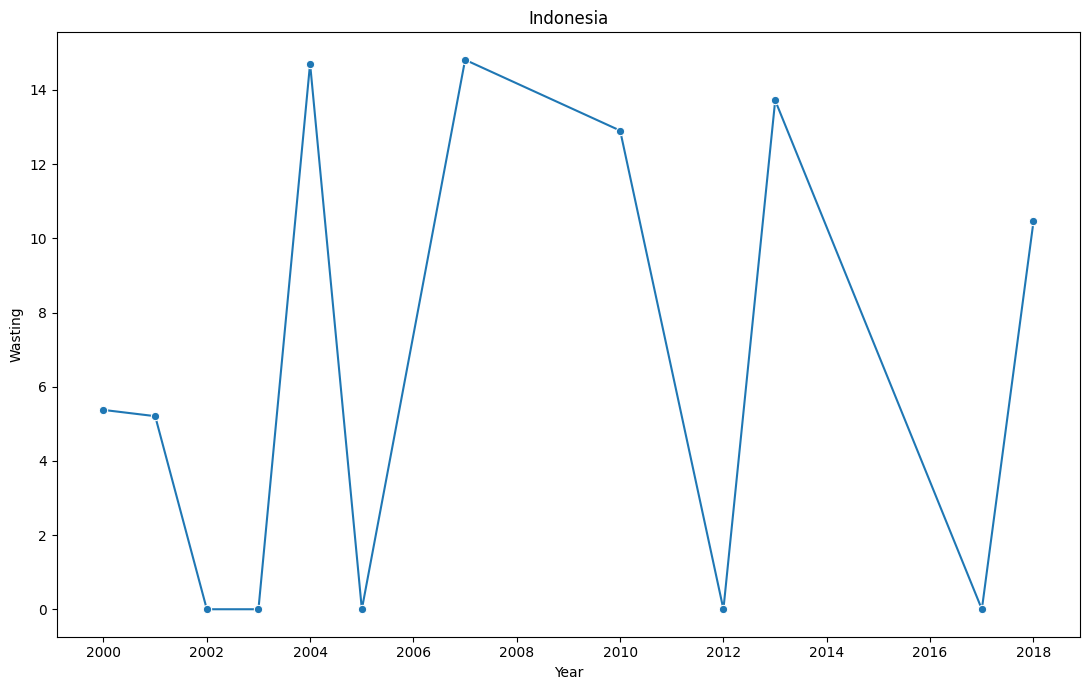

In [ ]:
wry = country_years_indo.groupby(['Country', 'Year'])['Wasting'].mean().reset_index()
plot_year_region_trend(wry, 'Wasting')

### C. Data Preparing
Di section ini kita akan melakukan data preparing agar bisa di modelkan dengan machine learning dengan pembagian data menjadi data train dan data test menggunakan library train_test_split dengan rasio 80:20.

#### A. Data Pre-Processing

In [69]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [71]:
# Convert Feature Maternal Education
LE = LabelEncoder()
nutri_indo['Maternal_Education'] = LE.fit_transform(nutri_indo['Maternal_Education'])
print(LE.classes_)
print(np.sort(nutri_indo['Maternal_Education'].unique()))
print(' ')

# Convert Feature Indicator
LE = LabelEncoder()
nutri_indo['Indicator'] = LE.fit_transform(nutri_indo['Indicator'])
print(LE.classes_)
print(np.sort(nutri_indo['Indicator'].unique()))
print(' ')

# Convert Feature Poverty_Rating
LE = LabelEncoder()
nutri_indo['Poverty_Rating'] = LE.fit_transform(nutri_indo['Poverty_Rating'])
print(LE.classes_)
print(np.sort(nutri_indo['Poverty_Rating'].unique()))
print(' ')

# Convert Feature Residence
LE = LabelEncoder()
nutri_indo['Residence'] = LE.fit_transform(nutri_indo['Residence'])
print(LE.classes_)
print(np.sort(nutri_indo['Residence'].unique()))
print(' ')

# Convert Feature Gender
LE = LabelEncoder()
nutri_indo['Gender'] = LE.fit_transform(nutri_indo['Gender'])
print(LE.classes_)
print(np.sort(nutri_indo['Gender'].unique()))
print(' ')

# Convert Feature Country
LE = LabelEncoder()
nutri_indo['Country'] = LE.fit_transform(nutri_indo['Country'])
print(LE.classes_)
print(np.sort(nutri_indo['Country'].unique()))
print(' ')

# Convert Feature Age
LE = LabelEncoder()
nutri_indo['Age'] = LE.fit_transform(nutri_indo['Age'])
print(LE.classes_)
print(np.sort(nutri_indo['Age'].unique()))
print(' ')

# Convert Feature Age
LE = LabelEncoder()
nutri_indo['Age'] = LE.fit_transform(nutri_indo['Age'])
print(LE.classes_)
print(np.sort(nutri_indo['Age'].unique()))
print(' ')

# Convert Feature Age
LE = LabelEncoder()
nutri_indo['Year'] = LE.fit_transform(nutri_indo['Year'])
print(LE.classes_)
print(np.sort(nutri_indo['Year'].unique()))
print(' ')

[0 1 2 3]
[0 1 2 3]
 
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
 
[0 1 2]
[0 1 2]
 
[0 1 2]
[0 1 2]
 
[0 1 2]
[0 1 2]
 
[0]
[0]
 
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
 
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
 
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
 


In [72]:
nutri_indo.head()

,Country,Indicator,Gender,Age,Poverty_Rating,Residence,Maternal_Education,Year,Observation_Value
0,0,0,0,2,1,1,0,3,85.7
1,0,0,0,2,1,1,0,6,80.9
2,0,0,0,2,1,1,0,8,78.7
3,0,0,0,2,1,1,0,10,79.3
4,0,0,1,2,1,1,0,3,83.6


In [73]:
nutri_indo.shape

(2159, 9)

In [74]:
X = nutri_indo[['Indicator', 'Residence',
                'Poverty_Rating', 'Maternal_Education', 'Age', 'Gender']]
y = nutri_indo['Observation_Value']

In [75]:
# Feature Selection
from sklearn import feature_selection
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(f_regression, k=7)
fit = selector.fit_transform(X, y)
# New dataframe with the selected features for later use in the classifier. fit() method works too, if you want only the feature names and their corresponding scores
X_new = selector.fit_transform(X, y)
names = X.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data=names_scores, columns=['Feat_names', 'F_Scores'])
# Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(
    ['F_Scores', 'Feat_names'], ascending=[False, True])
print(ns_df_sorted)

           Feat_names     F_Scores
0           Indicator  2952.800151
5              Gender   380.995359
3  Maternal_Education   204.841800
4                 Age     6.718011
2      Poverty_Rating     3.082395
1           Residence     0.258618


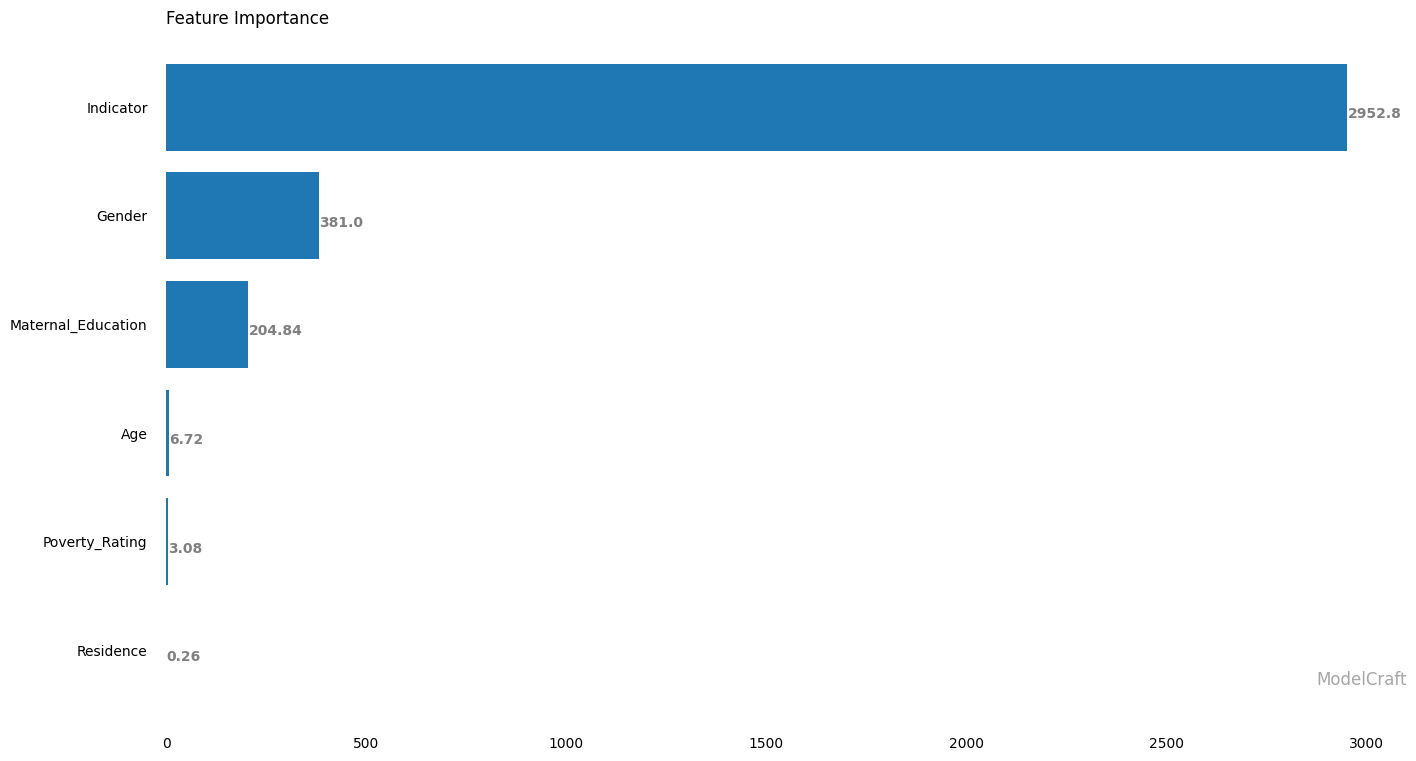

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt


feature = list(ns_df_sorted['Feat_names'].values)
score = list(ns_df_sorted['F_Scores'].values)

# Figure Size
fig, ax = plt.subplots(figsize=(16, 9))

# Horizontal Bar Plot
ax.barh(feature, score)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
          str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold',
            color='grey')

# Add Plot Title
ax.set_title('Feature Importance',
             loc='left', )

# Add Text watermark
fig.text(0.9, 0.15, 'ModelCraft', fontsize=12,
         color='grey', ha='right', va='bottom',
         alpha=0.7)

# Show Plot
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 2159
Total # of sample in train dataset: 1727
Total # of sample in test dataset: 432


In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['Indicator', 'Residence',
                      'Poverty_Rating', 'Maternal_Education', 'Age', 'Gender']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(
    X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Indicator,Residence,Poverty_Rating,Maternal_Education,Age,Gender
9869,1.055444,0.014595,0.042306,-0.208468,0.286315,0.867255
5038,-0.831463,0.014595,0.042306,-0.208468,1.186777,0.867255
9601,0.740960,0.014595,0.042306,-0.208468,-0.276474,0.867255
10320,1.369929,0.014595,0.042306,-0.208468,-0.501589,0.867255
4873,-0.831463,0.014595,0.042306,-0.208468,0.961661,-0.359403


#### B. Data Modeling

In [ ]:
nutrisi_indonesia = nutri_indo.copy()

In [ ]:
# Convert Feature Maternal Education
LE = LabelEncoder()
nutrisi_indonesia['Maternal_Education'] = LE.fit_transform(
    nutrisi_indonesia['Maternal_Education'])
print(LE.classes_)
print(np.sort(nutrisi_indonesia['Maternal_Education'].unique()))
print(' ')

# Convert Feature Indicator
LE = LabelEncoder()
nutrisi_indonesia['Indicator'] = LE.fit_transform(
    nutrisi_indonesia['Indicator'])
print(LE.classes_)
print(np.sort(nutrisi_indonesia['Indicator'].unique()))
print(' ')

# Convert Feature Poverty_Rating
LE = LabelEncoder()
nutrisi_indonesia['Poverty_Rating'] = LE.fit_transform(
    nutrisi_indonesia['Poverty_Rating'])
print(LE.classes_)
print(np.sort(nutrisi_indonesia['Poverty_Rating'].unique()))
print(' ')

# Convert Feature Residence
LE = LabelEncoder()
nutrisi_indonesia['Residence'] = LE.fit_transform(
    nutrisi_indonesia['Residence'])
print(LE.classes_)
print(np.sort(nutrisi_indonesia['Residence'].unique()))
print(' ')

# Convert Feature Gender
LE = LabelEncoder()
nutrisi_indonesia['Gender'] = LE.fit_transform(nutrisi_indonesia['Gender'])
print(LE.classes_)
print(np.sort(nutrisi_indonesia['Gender'].unique()))
print(' ')

# Convert Feature Country
LE = LabelEncoder()
nutrisi_indonesia['Country'] = LE.fit_transform(nutrisi_indonesia['Country'])
print(LE.classes_)
print(np.sort(nutrisi_indonesia['Country'].unique()))
print(' ')

# Convert Feature Age
LE = LabelEncoder()
nutrisi_indonesia['Age'] = LE.fit_transform(nutrisi_indonesia['Age'])
print(LE.classes_)
print(np.sort(nutrisi_indonesia['Age'].unique()))
print(' ')

# Convert Feature Age
LE = LabelEncoder()
nutrisi_indonesia['Age'] = LE.fit_transform(nutrisi_indonesia['Age'])
print(LE.classes_)
print(np.sort(nutrisi_indonesia['Age'].unique()))
print(' ')

# Convert Feature Age
LE = LabelEncoder()
nutrisi_indonesia['Year'] = LE.fit_transform(nutrisi_indonesia['Year'])
print(LE.classes_)
print(np.sort(nutrisi_indonesia['Year'].unique()))
print(' ')

[0 1 2 3]
[0 1 2 3]
 
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
 
[0 1 2]
[0 1 2]
 
[0 1 2]
[0 1 2]
 
[0 1 2]
[0 1 2]
 
[0]
[0]
 
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
 
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
 
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
 


In [ ]:
from sklearn.model_selection import train_test_split

Feature = nutri_indo[['Indicator', 'Residence',
                'Poverty_Rating', 'Maternal_Education', 'Age', 'Gender']]
Target = nutri_indo['Observation_Value']
X_train, X_test, y_train, y_test = train_test_split(
    Feature, Target, test_size=0.2, random_state=2)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

# Decision Tree Regression
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)

# Random Forest Regression
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)
forest_predictions = forest_model.predict(X_test)

# Support Vector Regression
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_predictions = svr_model.predict(X_test)

# Gradient Boosting Regression
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

#### C. Evaluasi Model

In [ ]:
# Evaluation Metrics
linear_mae = mean_absolute_error(y_test, linear_predictions)
tree_mae = mean_absolute_error(y_test, tree_predictions)
forest_mae = mean_absolute_error(y_test, forest_predictions)
svr_mae = mean_absolute_error(y_test, svr_predictions)
gb_mae = mean_absolute_error(y_test, gb_predictions)

linear_mse = mean_squared_error(y_test, linear_predictions)
tree_mse = mean_squared_error(y_test, tree_predictions)
forest_mse = mean_squared_error(y_test, forest_predictions)
svr_mse = mean_squared_error(y_test, svr_predictions)
gb_mse = mean_squared_error(y_test, gb_predictions)

print("Mean Absolute Error:")
print(f"Linear Regression: {linear_mae}")
print(f"Decision Tree Regression: {tree_mae}")
print(f"Random Forest Regression: {forest_mae}")
print(f"Support Vector Regression: {svr_mae}")
print(f"Gradient Boosting Regression: {gb_mae}")

print("\nMean Squared Error:")
print(f"Linear Regression: {linear_mse}")
print(f"Decision Tree Regression: {tree_mse}")
print(f"Random Forest Regression: {forest_mse}")
print(f"Support Vector Regression: {svr_mse}")
print(f"Gradient Boosting Regression: {gb_mse}")

Mean Absolute Error:
Linear Regression: 14.003300041744867
Decision Tree Regression: 4.044939218446164
Random Forest Regression: 3.895187724039845
Support Vector Regression: 14.680108382454234
Gradient Boosting Regression: 4.12326667959154

Mean Squared Error:
Linear Regression: 358.52262708168337
Decision Tree Regression: 35.819296917089424
Random Forest Regression: 31.799153190570546
Support Vector Regression: 466.5647652463983
Gradient Boosting Regression: 31.008253750746402


In [ ]:
from sklearn.metrics import r2_score

# R-squared (coefficient of determination) evaluation
linear_r2 = r2_score(y_test, linear_predictions)
tree_r2 = r2_score(y_test, tree_predictions)
forest_r2 = r2_score(y_test, forest_predictions)
svr_r2 = r2_score(y_test, svr_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

print("R-squared (Coefficient of Determination):")
print(f"Linear Regression: {linear_r2}")
print(f"Decision Tree Regression: {tree_r2}")
print(f"Random Forest Regression: {forest_r2}")
print(f"Support Vector Regression: {svr_r2}")
print(f"Gradient Boosting Regression: {gb_r2}")

R-squared (Coefficient of Determination):
Linear Regression: 0.6282733659089431
Decision Tree Regression: 0.9628615164769943
Random Forest Regression: 0.9670297178208963
Support Vector Regression: 0.5162521507156825
Gradient Boosting Regression: 0.9678497452458413


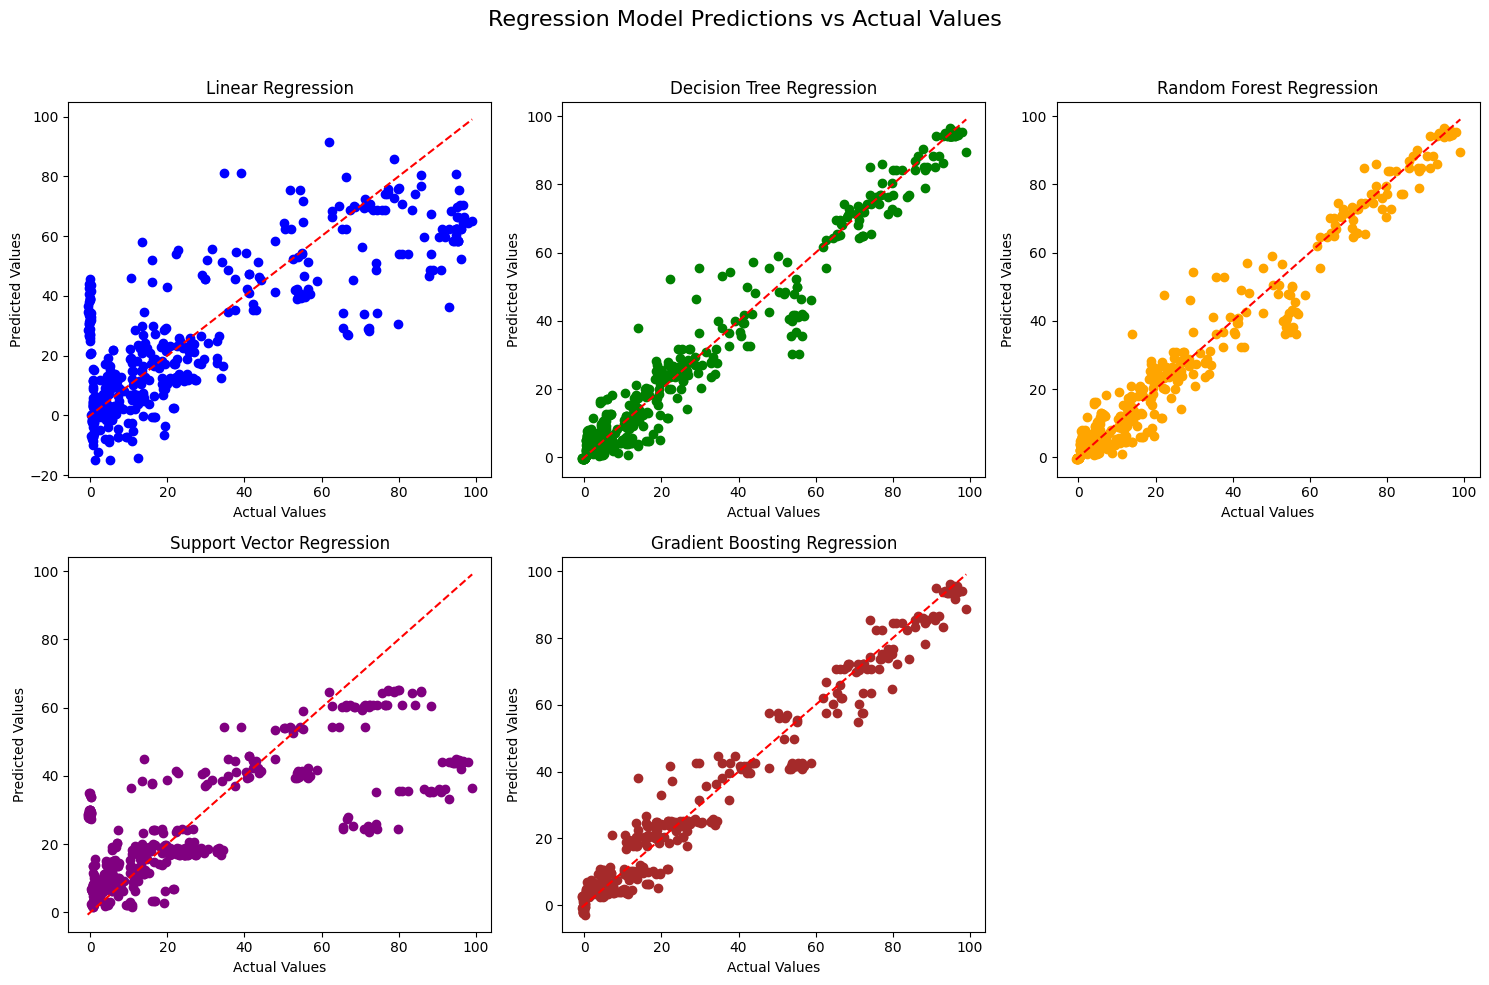

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Regression Model Predictions vs Actual Values', fontsize=16)

# Linear Regression
axes[0, 0].scatter(y_test, linear_predictions,
                   color='blue', label='Linear Regression')
axes[0, 0].plot([min(y_test), max(y_test)], [min(y_test), max(
    y_test)], linestyle='--', color='red', label='Perfect Prediction')
axes[0, 0].set_title('Linear Regression')
axes[0, 0].set_xlabel('Actual Values')
axes[0, 0].set_ylabel('Predicted Values')

# Decision Tree Regression
axes[0, 1].scatter(y_test, tree_predictions, color='green',
                   label='Decision Tree Regression')
axes[0, 1].plot([min(y_test), max(y_test)], [min(y_test), max(
    y_test)], linestyle='--', color='red', label='Perfect Prediction')
axes[0, 1].set_title('Decision Tree Regression')
axes[0, 1].set_xlabel('Actual Values')
axes[0, 1].set_ylabel('Predicted Values')

# Random Forest Regression
axes[0, 2].scatter(y_test, forest_predictions, color='orange',
                   label='Random Forest Regression')
axes[0, 2].plot([min(y_test), max(y_test)], [min(y_test), max(
    y_test)], linestyle='--', color='red', label='Perfect Prediction')
axes[0, 2].set_title('Random Forest Regression')
axes[0, 2].set_xlabel('Actual Values')
axes[0, 2].set_ylabel('Predicted Values')

# Support Vector Regression
axes[1, 0].scatter(y_test, svr_predictions, color='purple',
                   label='Support Vector Regression')
axes[1, 0].plot([min(y_test), max(y_test)], [min(y_test), max(
    y_test)], linestyle='--', color='red', label='Perfect Prediction')
axes[1, 0].set_title('Support Vector Regression')
axes[1, 0].set_xlabel('Actual Values')
axes[1, 0].set_ylabel('Predicted Values')

# Gradient Boosting Regression
axes[1, 1].scatter(y_test, gb_predictions, color='brown',
                   label='Gradient Boosting Regression')
axes[1, 1].plot([min(y_test), max(y_test)], [min(y_test), max(
    y_test)], linestyle='--', color='red', label='Perfect Prediction')
axes[1, 1].set_title('Gradient Boosting Regression')
axes[1, 1].set_xlabel('Actual Values')
axes[1, 1].set_ylabel('Predicted Values')

# Remove empty subplot
fig.delaxes(axes[1, 2])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()